In [18]:
import pandas as pd 

In [19]:

df=pd.read_csv("C:/Users/yugay/Downloads/Application/application_train (2).csv")

In [20]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df.shape

(307511, 122)

In [22]:
default_rate = df['TARGET'].mean()


In [23]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
default_rate 

np.float64(0.08072881945686496)

In [25]:
# Count of each class
class_counts = df['TARGET'].value_counts()

# Rename for clarity (optional)
class_counts.index = ['Repaid (0)', 'Defaulted (1)']
print(class_counts)


Repaid (0)       282686
Defaulted (1)     24825
Name: count, dtype: int64


In [26]:
# Count of each loan type
loan_type_counts = df['NAME_CONTRACT_TYPE'].value_counts()

print(loan_type_counts)


NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


In [27]:
default_rate_by_loan_type = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean()
print(default_rate_by_loan_type)


NAME_CONTRACT_TYPE
Cash loans         0.083459
Revolving loans    0.054783
Name: TARGET, dtype: float64


In [28]:
gender_distribution = df['CODE_GENDER'].value_counts()
print(gender_distribution)


CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


In [29]:
default_rate_by_gender = df.groupby('CODE_GENDER')['TARGET'].mean()
print(default_rate_by_gender)


CODE_GENDER
F      0.069993
M      0.101419
XNA    0.000000
Name: TARGET, dtype: float64


In [30]:
import numpy as np

# Convert to age in years
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) / 365.25


In [31]:
df['AGE_YEARS']

0         25.902806
1         45.900068
2         52.145106
3         52.032854
4         54.570842
            ...    
307506    25.535934
307507    56.878850
307508    40.974675
307509    32.747433
307510    46.149213
Name: AGE_YEARS, Length: 307511, dtype: float64

In [32]:
# Summary statistics
print(df['AGE_YEARS'].describe())

# Optional: binning for a clearer age profile
age_bins = pd.cut(df['AGE_YEARS'], bins=[20, 30, 40, 50, 60, 70, 80])
age_distribution = age_bins.value_counts().sort_index()
print(age_distribution)


count    307511.000000
mean         43.906900
std          11.947950
min          20.503765
25%          33.984942
50%          43.121150
75%          53.886379
max          69.073238
Name: AGE_YEARS, dtype: float64
AGE_YEARS
(20, 30]    45186
(30, 40]    82349
(40, 50]    76581
(50, 60]    68109
(60, 70]    35286
(70, 80]        0
Name: count, dtype: int64


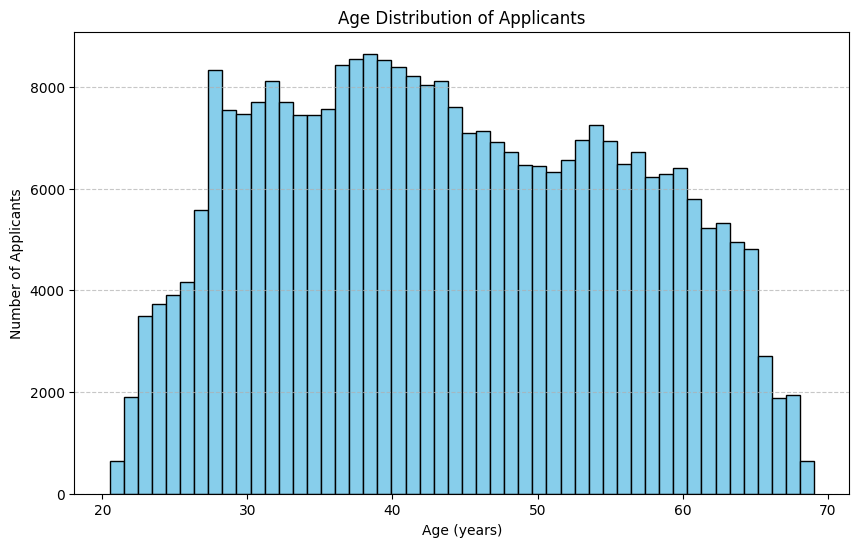

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['AGE_YEARS'], bins=50, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Applicants')
plt.xlabel('Age (years)')
plt.ylabel('Number of Applicants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [34]:
import pandas as pd

# convert to age in years
df['AGE'] = (-df['DAYS_BIRTH']) / 365

# create bins and labels
bins = [20, 30, 40, 50, 60, 70, 100]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70+']

# create age group column
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)


In [35]:
default_rate_by_age = df.groupby('AGE_GROUP')['TARGET'].mean()
print(default_rate_by_age)

AGE_GROUP
20-30    0.114556
30-40    0.095809
40-50    0.076558
50-60    0.061301
60-70    0.049220
70+           NaN
Name: TARGET, dtype: float64


C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\1223854581.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_age = df.groupby('AGE_GROUP')['TARGET'].mean()


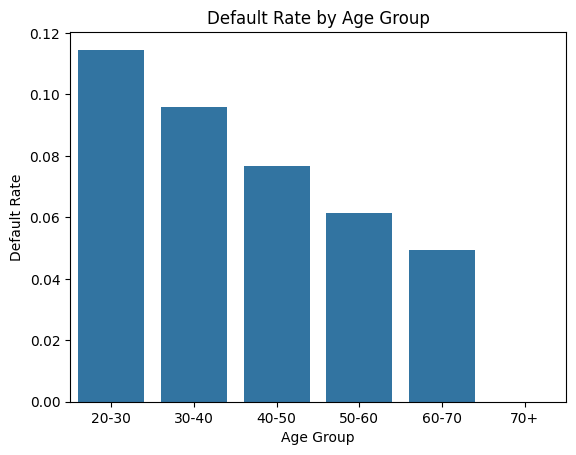

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=default_rate_by_age.index, y=default_rate_by_age.values)
plt.ylabel('Default Rate')
plt.xlabel('Age Group')
plt.title('Default Rate by Age Group')
plt.show()


In [37]:
default_rate_by_family_status = df.groupby('NAME_FAMILY_STATUS')['TARGET'].mean()
print(default_rate_by_family_status)


NAME_FAMILY_STATUS
Civil marriage          0.099446
Married                 0.075599
Separated               0.081942
Single / not married    0.098077
Unknown                 0.000000
Widow                   0.058242
Name: TARGET, dtype: float64


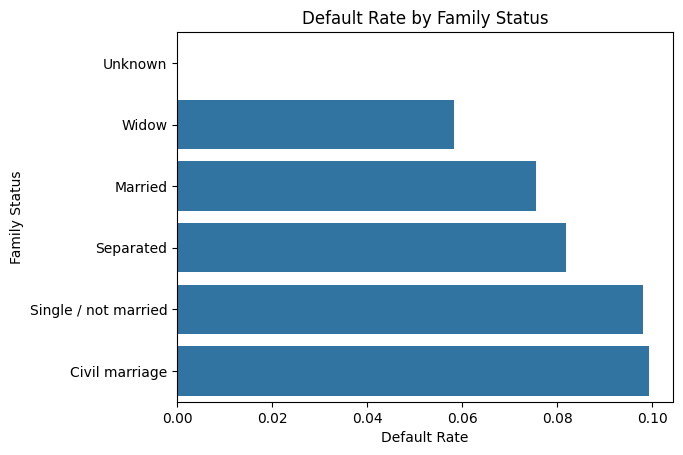

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by default rate for easier interpretation
default_rate_by_family_status = default_rate_by_family_status.sort_values()

sns.barplot(
    x=default_rate_by_family_status.values,
    y=default_rate_by_family_status.index,
    orient='h'
)
plt.xlabel('Default Rate')
plt.ylabel('Family Status')
plt.title('Default Rate by Family Status')
plt.show()


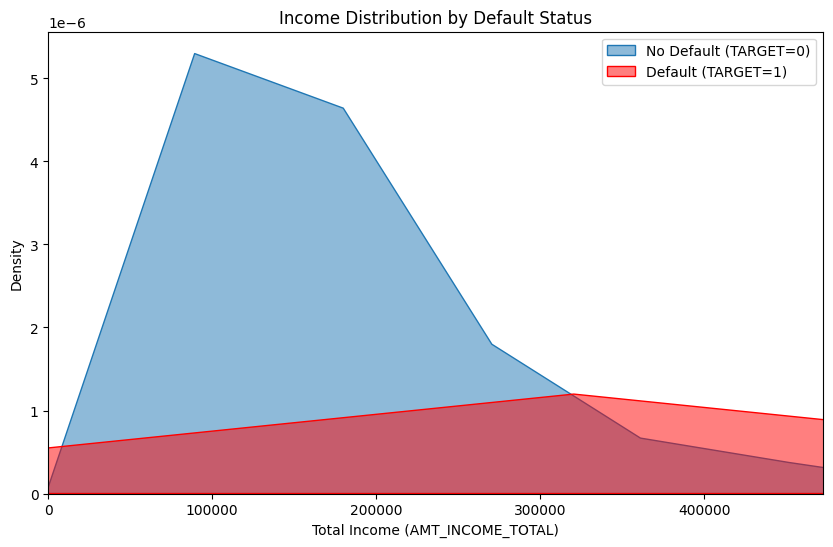

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Plot income distribution for each TARGET group
sns.kdeplot(
    data=df[df['TARGET'] == 0], 
    x='AMT_INCOME_TOTAL', 
    label='No Default (TARGET=0)', 
    fill=True, alpha=0.5
)
sns.kdeplot(
    data=df[df['TARGET'] == 1], 
    x='AMT_INCOME_TOTAL', 
    label='Default (TARGET=1)', 
    fill=True, alpha=0.5, color='red'
)

plt.xlim(0, df['AMT_INCOME_TOTAL'].quantile(0.99))  # limit extreme outliers
plt.xlabel('Total Income (AMT_INCOME_TOTAL)')
plt.ylabel('Density')
plt.title('Income Distribution by Default Status')
plt.legend()
plt.show()


In [40]:
# Optional: clip at 99th percentile to avoid long tails dominating plot
income_cap = df['AMT_INCOME_TOTAL'].quantile(0.99)
df['AMT_INCOME_TOTAL_CLIPPED'] = df['AMT_INCOME_TOTAL'].clip(upper=income_cap)


In [41]:
df['AMT_INCOME_TOTAL_CLIPPED']

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL_CLIPPED, Length: 307511, dtype: float64

In [42]:
# Count of applicants by education level
education_counts = df['NAME_EDUCATION_TYPE'].value_counts()

# Proportions (percentage)
education_percent = df['NAME_EDUCATION_TYPE'].value_counts(normalize=True) * 100

print("Counts:\n", education_counts)
print("\nPercentages:\n", education_percent)


Counts:
 NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

Percentages:
 NAME_EDUCATION_TYPE
Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: proportion, dtype: float64


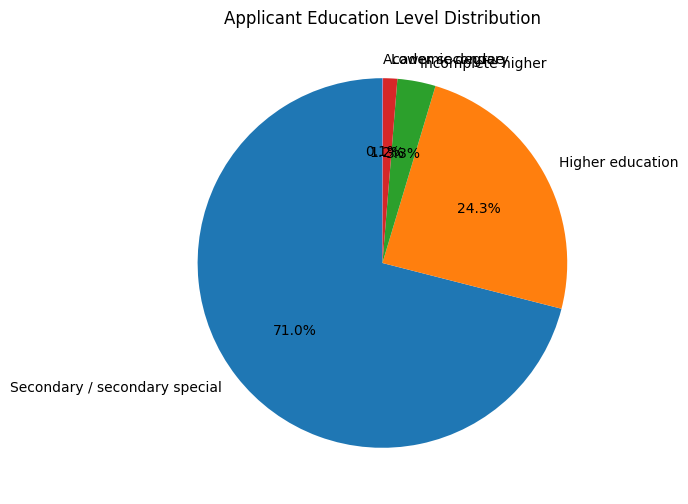

In [43]:
education_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.ylabel('')
plt.title('Applicant Education Level Distribution')
plt.show()


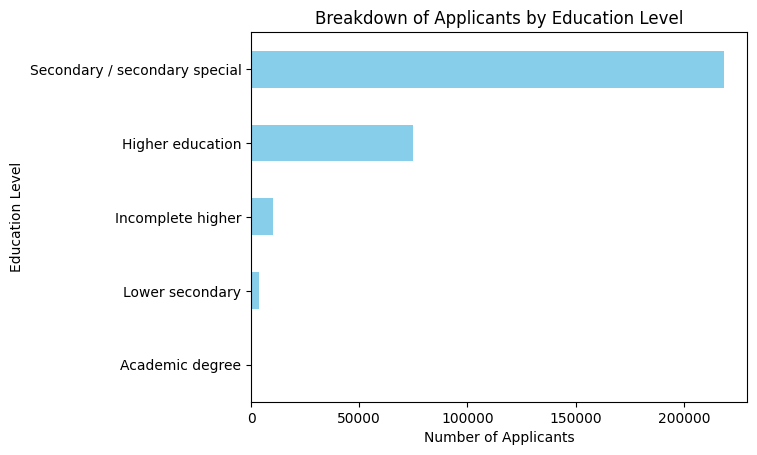

In [44]:
import matplotlib.pyplot as plt

education_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Applicants')
plt.ylabel('Education Level')
plt.title('Breakdown of Applicants by Education Level')
plt.gca().invert_yaxis()  # highest count on top
plt.show()


In [45]:
default_rate_by_education = df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values()
print(default_rate_by_education)


NAME_EDUCATION_TYPE
Academic degree                  0.018293
Higher education                 0.053551
Incomplete higher                0.084850
Secondary / secondary special    0.089399
Lower secondary                  0.109277
Name: TARGET, dtype: float64


C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\3718298883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


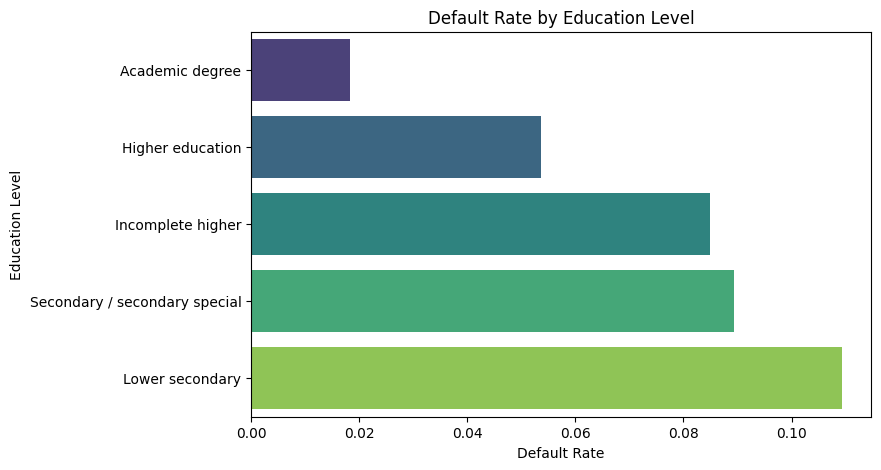

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    x=default_rate_by_education.values,
    y=default_rate_by_education.index,
    orient='h',
    palette='viridis'
)
plt.xlabel('Default Rate')
plt.ylabel('Education Level')
plt.title('Default Rate by Education Level')
plt.show()


In [47]:
df['HAS_CHILDREN'] = df['CNT_CHILDREN'] > 0


In [48]:
df['HAS_CHILDREN']


0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: HAS_CHILDREN, Length: 307511, dtype: bool

In [49]:
default_rate_children = df.groupby('HAS_CHILDREN')['TARGET'].mean()
print(default_rate_children)


HAS_CHILDREN
False    0.077118
True     0.089169
Name: TARGET, dtype: float64


C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\468223643.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


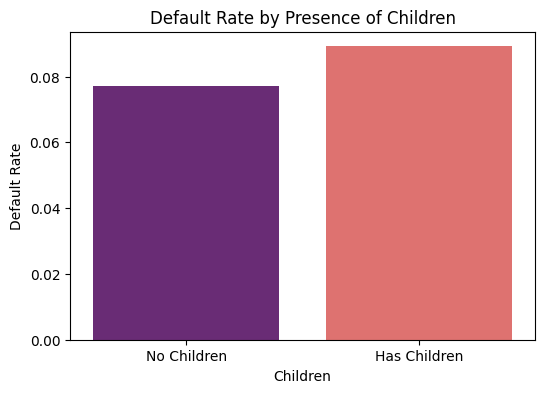

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(
    x=default_rate_children.index.map({False: 'No Children', True: 'Has Children'}),
    y=default_rate_children.values,
    palette='magma'
)
plt.ylabel('Default Rate')
plt.xlabel('Children')
plt.title('Default Rate by Presence of Children')
plt.show()


In [51]:

default_rate_by_car = df.groupby('FLAG_OWN_CAR')['TARGET'].mean()
print(default_rate_by_car)





FLAG_OWN_CAR
N    0.085002
Y    0.072437
Name: TARGET, dtype: float64


C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\837377241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


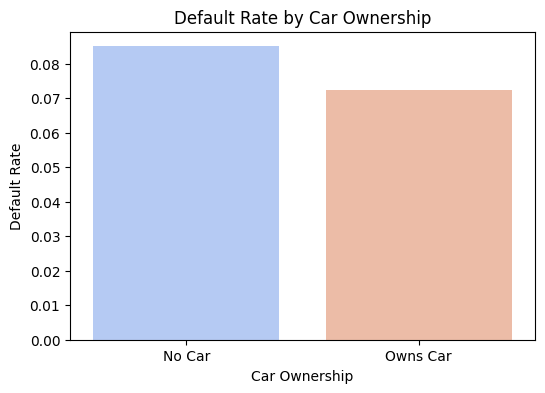

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(
    x=default_rate_by_car.index.map({'N': 'No Car', 'Y': 'Owns Car'}),
    y=default_rate_by_car.values,
    palette='coolwarm'
)
plt.ylabel('Default Rate')
plt.xlabel('Car Ownership')
plt.title('Default Rate by Car Ownership')
plt.show()


In [53]:
default_rate_by_realty = df.groupby('FLAG_OWN_REALTY')['TARGET'].mean()
print(default_rate_by_realty)


FLAG_OWN_REALTY
N    0.083249
Y    0.079616
Name: TARGET, dtype: float64


C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\3189721513.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


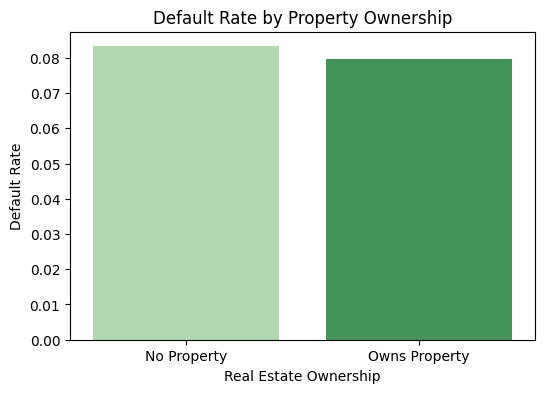

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(
    x=default_rate_by_realty.index.map({'N': 'No Property', 'Y': 'Owns Property'}),
    y=default_rate_by_realty.values,
    palette='Greens'
)
plt.ylabel('Default Rate')
plt.xlabel('Real Estate Ownership')
plt.title('Default Rate by Property Ownership')
plt.show()


In [55]:
housing_counts = df['NAME_HOUSING_TYPE'].value_counts()
print(housing_counts)



NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64


In [56]:
default_rate_by_housing = df.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().sort_values()
print(default_rate_by_housing)


NAME_HOUSING_TYPE
Office apartment       0.065724
House / apartment      0.077957
Co-op apartment        0.079323
Municipal apartment    0.085397
With parents           0.116981
Rented apartment       0.123131
Name: TARGET, dtype: float64


C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\2686822381.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


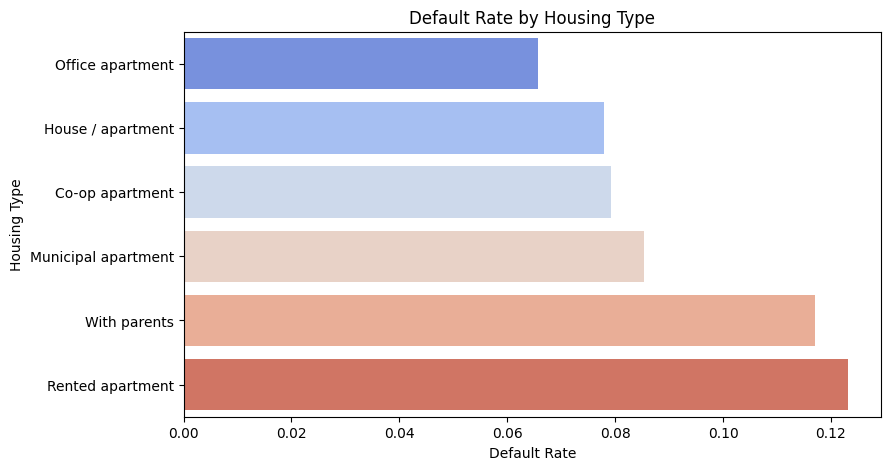

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
sns.barplot(
    x=default_rate_by_housing.values,
    y=default_rate_by_housing.index,
    palette='coolwarm'
)
plt.xlabel('Default Rate')
plt.ylabel('Housing Type')
plt.title('Default Rate by Housing Type')
plt.show()


In [58]:
print(df['AMT_CREDIT'].describe())


count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


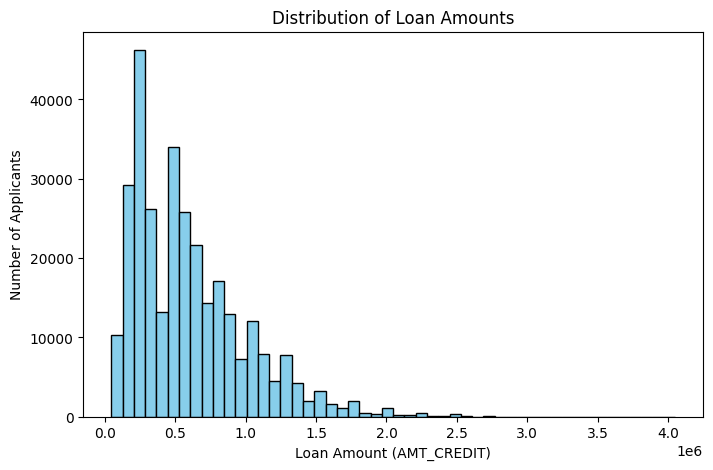

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['AMT_CREDIT'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Loan Amount (AMT_CREDIT)')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Loan Amounts')
plt.show()


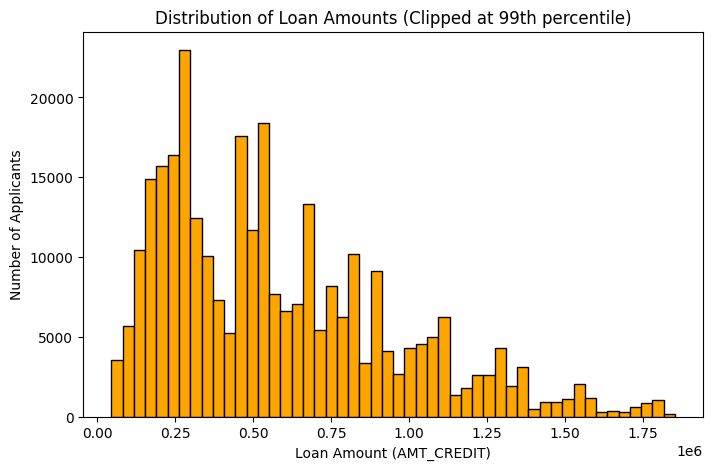

In [60]:
credit_cap = df['AMT_CREDIT'].quantile(0.99)

plt.figure(figsize=(8,5))
plt.hist(df[df['AMT_CREDIT'] < credit_cap]['AMT_CREDIT'], bins=50, color='orange', edgecolor='black')
plt.xlabel('Loan Amount (AMT_CREDIT)')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Loan Amounts (Clipped at 99th percentile)')
plt.show()


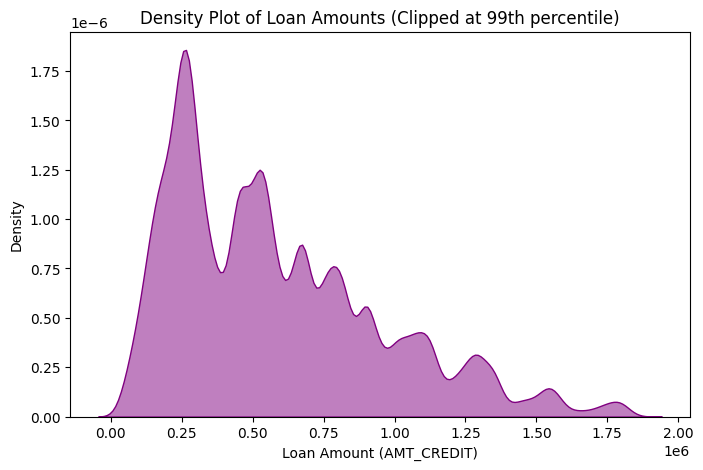

In [61]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df[df['AMT_CREDIT'] < credit_cap],
    x='AMT_CREDIT',
    fill=True, color='purple', alpha=0.5
)
plt.xlabel('Loan Amount (AMT_CREDIT)')
plt.title('Density Plot of Loan Amounts (Clipped at 99th percentile)')
plt.show()


In [62]:
correlation = df[['AMT_CREDIT', 'AMT_GOODS_PRICE']].corr()
print(correlation)


                 AMT_CREDIT  AMT_GOODS_PRICE
AMT_CREDIT         1.000000         0.986968
AMT_GOODS_PRICE    0.986968         1.000000


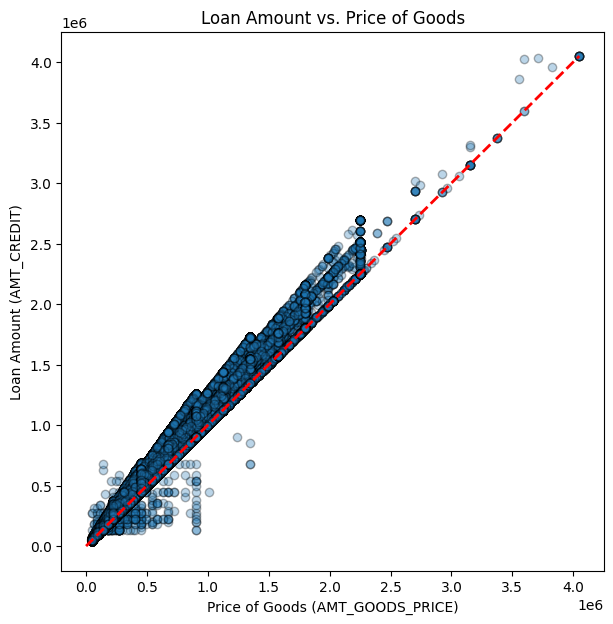

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(df['AMT_GOODS_PRICE'], df['AMT_CREDIT'], alpha=0.3, edgecolor='k')
plt.plot([0, df['AMT_GOODS_PRICE'].max()], [0, df['AMT_GOODS_PRICE'].max()], 'r--', lw=2)  # line y = x
plt.xlabel('Price of Goods (AMT_GOODS_PRICE)')
plt.ylabel('Loan Amount (AMT_CREDIT)')
plt.title('Loan Amount vs. Price of Goods')
plt.show()


In [64]:
df['CREDIT_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']


In [65]:
df['CREDIT_GOODS_RATIO'] 


0         1.158397
1         1.145199
2         1.000000
3         1.052803
4         1.000000
            ...   
307506    1.132000
307507    1.198000
307508    1.158400
307509    1.158394
307510    1.000000
Name: CREDIT_GOODS_RATIO, Length: 307511, dtype: float64

In [66]:
print(df['CREDIT_GOODS_RATIO'].describe())


count    307233.000000
mean          1.122995
std           0.124045
min           0.150000
25%           1.000000
50%           1.118800
75%           1.198000
max           6.000000
Name: CREDIT_GOODS_RATIO, dtype: float64


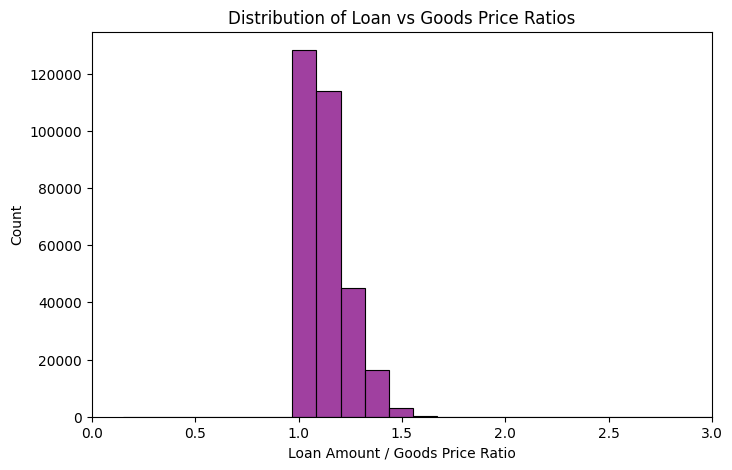

In [67]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['CREDIT_GOODS_RATIO'], bins=50, color='purple')
plt.xlabel('Loan Amount / Goods Price Ratio')
plt.title('Distribution of Loan vs Goods Price Ratios')
plt.xlim(0, 3)  # limit to see main bulk, adjust if needed
plt.show()


In [68]:
income_counts = df['NAME_INCOME_TYPE'].value_counts()
print(income_counts)


NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\3176115596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


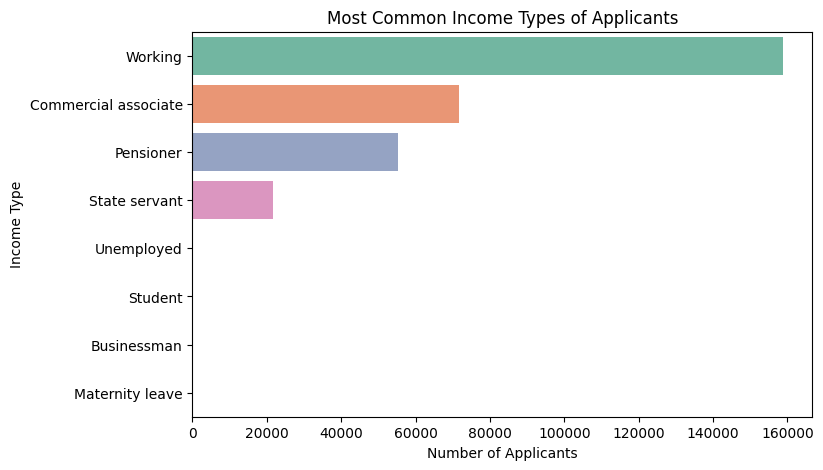

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    x=income_counts.values,
    y=income_counts.index,
    palette='Set2'
)
plt.xlabel('Number of Applicants')
plt.ylabel('Income Type')
plt.title('Most Common Income Types of Applicants')
plt.show()


In [70]:
default_rate_by_income = df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values()
print(default_rate_by_income)


NAME_INCOME_TYPE
Businessman             0.000000
Student                 0.000000
Pensioner               0.053864
State servant           0.057550
Commercial associate    0.074843
Working                 0.095885
Unemployed              0.363636
Maternity leave         0.400000
Name: TARGET, dtype: float64


C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\779393685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


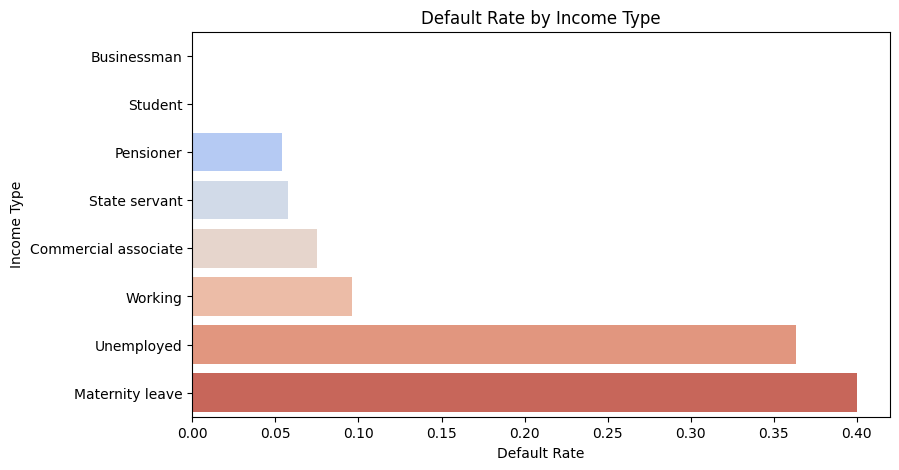

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
sns.barplot(
    x=default_rate_by_income.values,
    y=default_rate_by_income.index,
    palette='coolwarm'
)
plt.xlabel('Default Rate')
plt.ylabel('Income Type')
plt.title('Default Rate by Income Type')
plt.show()


In [72]:
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']


In [73]:
df['CREDIT_INCOME_RATIO']

0         2.007889
1         4.790750
2         2.000000
3         2.316167
4         4.222222
            ...   
307506    1.617143
307507    3.743750
307508    4.429176
307509    2.164368
307510    4.285714
Name: CREDIT_INCOME_RATIO, Length: 307511, dtype: float64

In [74]:
print(df['CREDIT_INCOME_RATIO'].describe())


count    307511.000000
mean          3.957570
std           2.689728
min           0.004808
25%           2.018667
50%           3.265067
75%           5.159880
max          84.736842
Name: CREDIT_INCOME_RATIO, dtype: float64


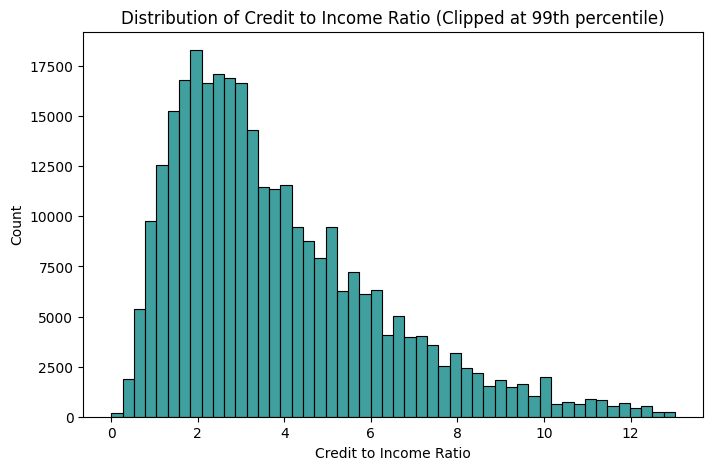

In [75]:
cap_99 = df['CREDIT_INCOME_RATIO'].quantile(0.99)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df[df['CREDIT_INCOME_RATIO'] < cap_99]['CREDIT_INCOME_RATIO'], 
             bins=50, color='teal')
plt.xlabel('Credit to Income Ratio')
plt.title('Distribution of Credit to Income Ratio (Clipped at 99th percentile)')
plt.show()


In [76]:
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']


In [77]:
df['CREDIT_INCOME_RATIO']

0         2.007889
1         4.790750
2         2.000000
3         2.316167
4         4.222222
            ...   
307506    1.617143
307507    3.743750
307508    4.429176
307509    2.164368
307510    4.285714
Name: CREDIT_INCOME_RATIO, Length: 307511, dtype: float64

In [78]:
import pandas as pd

bins = [0, 1, 3, 5, 10, df['CREDIT_INCOME_RATIO'].max()]
labels = ['<1x', '1-3x', '3-5x', '5-10x', '>10x']
df['CREDIT_INCOME_BIN'] = pd.cut(df['CREDIT_INCOME_RATIO'], bins=bins, labels=labels, include_lowest=True)


In [79]:
df['CREDIT_INCOME_BIN'] 

0         1-3x
1         3-5x
2         1-3x
3         1-3x
4         3-5x
          ... 
307506    1-3x
307507    3-5x
307508    3-5x
307509    1-3x
307510    3-5x
Name: CREDIT_INCOME_BIN, Length: 307511, dtype: category
Categories (5, object): ['<1x' < '1-3x' < '3-5x' < '5-10x' < '>10x']

In [80]:
default_rates = df.groupby('CREDIT_INCOME_BIN')['TARGET'].mean()
print(default_rates)


CREDIT_INCOME_BIN
<1x      0.064363
1-3x     0.082114
3-5x     0.088354
5-10x    0.074546
>10x     0.068367
Name: TARGET, dtype: float64


C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\2246362703.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby('CREDIT_INCOME_BIN')['TARGET'].mean()


C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\2080490486.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette='Reds')


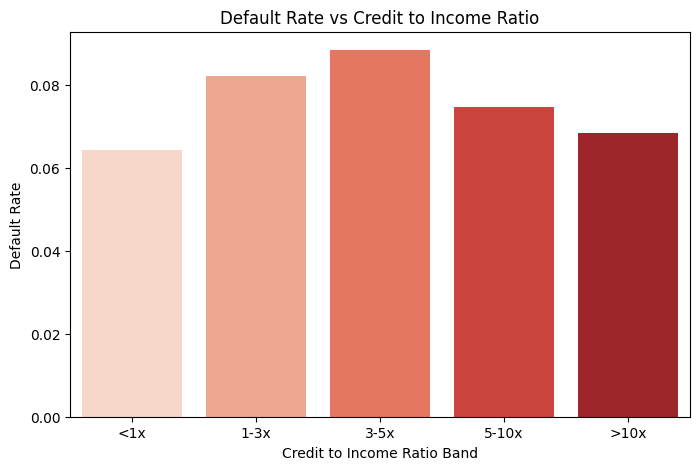

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=default_rates.index, y=default_rates.values, palette='Reds')
plt.ylabel('Default Rate')
plt.xlabel('Credit to Income Ratio Band')
plt.title('Default Rate vs Credit to Income Ratio')
plt.show()


In [82]:
df['YEARS_EMPLOYED'] = (-df['DAYS_EMPLOYED']) / 365


In [83]:
df['YEARS_EMPLOYED']

0            1.745205
1            3.254795
2            0.616438
3            8.326027
4            8.323288
             ...     
307506       0.646575
307507   -1000.665753
307508      21.701370
307509      13.112329
307510       3.457534
Name: YEARS_EMPLOYED, Length: 307511, dtype: float64

In [84]:
print(df['YEARS_EMPLOYED'].describe())


count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64


In [85]:
df_clean = df[df['DAYS_EMPLOYED'] < 365243]


In [86]:
df_clean

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,AGE,AGE_GROUP,AMT_INCOME_TOTAL_CLIPPED,HAS_CHILDREN,CREDIT_GOODS_RATIO,CREDIT_INCOME_RATIO,CREDIT_INCOME_BIN,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,25.902806,25.920548,20-30,202500.0,False,1.158397,2.007889,1-3x,1.745205
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,45.900068,45.931507,40-50,270000.0,False,1.145199,4.790750,3-5x,3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,52.145106,52.180822,50-60,67500.0,False,1.000000,2.000000,1-3x,0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,52.032854,52.068493,50-60,135000.0,False,1.052803,2.316167,1-3x,8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,54.570842,54.608219,50-60,121500.0,False,1.000000,4.222222,3-5x,8.323288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,NaN,45.735797,45.767123,40-50,153000.0,False,1.475200,2.169412,1-3x,19.884932
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,25.535934,25.553425,20-30,157500.0,False,1.132000,1.617143,1-3x,0.646575
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1.0,40.974675,41.002740,40-50,153000.0,False,1.158400,4.429176,3-5x,21.701370
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,32.747433,32.769863,30-40,171000.0,False,1.158394,2.164368,1-3x,13.112329


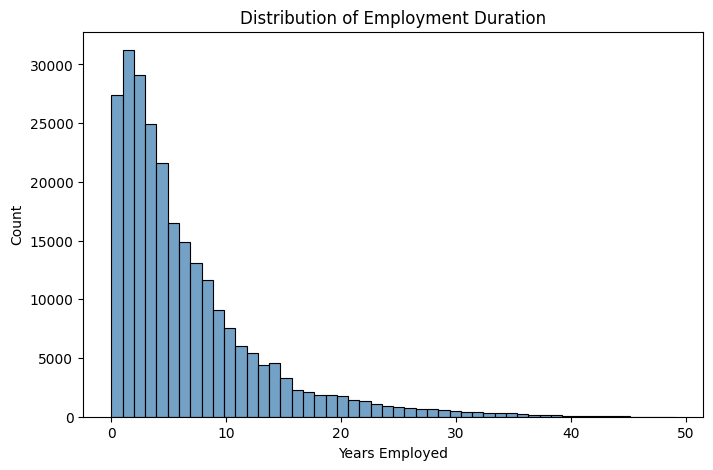

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df_clean['YEARS_EMPLOYED'], bins=50, color='steelblue')
plt.xlabel('Years Employed')
plt.title('Distribution of Employment Duration')
plt.show()


In [88]:
df_clean = df[df['DAYS_EMPLOYED'] < 365243].copy()
df_clean['YEARS_EMPLOYED'] = (-df_clean['DAYS_EMPLOYED']) / 365


In [89]:
df_clean

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,AGE,AGE_GROUP,AMT_INCOME_TOTAL_CLIPPED,HAS_CHILDREN,CREDIT_GOODS_RATIO,CREDIT_INCOME_RATIO,CREDIT_INCOME_BIN,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,25.902806,25.920548,20-30,202500.0,False,1.158397,2.007889,1-3x,1.745205
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,45.900068,45.931507,40-50,270000.0,False,1.145199,4.790750,3-5x,3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,52.145106,52.180822,50-60,67500.0,False,1.000000,2.000000,1-3x,0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,52.032854,52.068493,50-60,135000.0,False,1.052803,2.316167,1-3x,8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,54.570842,54.608219,50-60,121500.0,False,1.000000,4.222222,3-5x,8.323288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,NaN,45.735797,45.767123,40-50,153000.0,False,1.475200,2.169412,1-3x,19.884932
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,25.535934,25.553425,20-30,157500.0,False,1.132000,1.617143,1-3x,0.646575
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1.0,40.974675,41.002740,40-50,153000.0,False,1.158400,4.429176,3-5x,21.701370
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,32.747433,32.769863,30-40,171000.0,False,1.158394,2.164368,1-3x,13.112329


In [90]:
import pandas as pd

bins = [0, 1, 3, 5, 10, 20, df_clean['YEARS_EMPLOYED'].max()]
labels = ['<1 yr', '1-3 yrs', '3-5 yrs', '5-10 yrs', '10-20 yrs', '>20 yrs']

df_clean['EMPLOYMENT_BIN'] = pd.cut(df_clean['YEARS_EMPLOYED'], bins=bins, labels=labels, include_lowest=True)


In [91]:
df_clean

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AGE_YEARS,AGE,AGE_GROUP,AMT_INCOME_TOTAL_CLIPPED,HAS_CHILDREN,CREDIT_GOODS_RATIO,CREDIT_INCOME_RATIO,CREDIT_INCOME_BIN,YEARS_EMPLOYED,EMPLOYMENT_BIN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,25.902806,25.920548,20-30,202500.0,False,1.158397,2.007889,1-3x,1.745205,1-3 yrs
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,45.900068,45.931507,40-50,270000.0,False,1.145199,4.790750,3-5x,3.254795,3-5 yrs
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,52.145106,52.180822,50-60,67500.0,False,1.000000,2.000000,1-3x,0.616438,<1 yr
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,52.032854,52.068493,50-60,135000.0,False,1.052803,2.316167,1-3x,8.326027,5-10 yrs
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,54.570842,54.608219,50-60,121500.0,False,1.000000,4.222222,3-5x,8.323288,5-10 yrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,45.735797,45.767123,40-50,153000.0,False,1.475200,2.169412,1-3x,19.884932,10-20 yrs
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,25.535934,25.553425,20-30,157500.0,False,1.132000,1.617143,1-3x,0.646575,<1 yr
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,40.974675,41.002740,40-50,153000.0,False,1.158400,4.429176,3-5x,21.701370,>20 yrs
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,32.747433,32.769863,30-40,171000.0,False,1.158394,2.164368,1-3x,13.112329,10-20 yrs


In [92]:
default_rates = df_clean.groupby('EMPLOYMENT_BIN')['TARGET'].mean()
counts = df_clean['EMPLOYMENT_BIN'].value_counts().sort_index()

print(pd.DataFrame({'Count': counts, 'Default Rate': default_rates}))


                Count  Default Rate
EMPLOYMENT_BIN                     
<1 yr           27982      0.109713
1-3 yrs         61472      0.110733
3-5 yrs         46857      0.096741
5-10 yrs        64872      0.073714
10-20 yrs       38398      0.055133
>20 yrs         12556      0.041892


C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\2250733989.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df_clean.groupby('EMPLOYMENT_BIN')['TARGET'].mean()


C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\1301362610.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette='Greens')


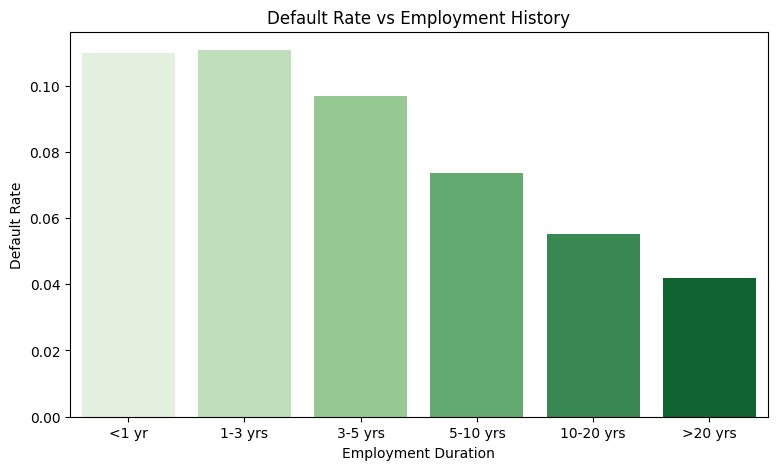

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
sns.barplot(x=default_rates.index, y=default_rates.values, palette='Greens')
plt.ylabel('Default Rate')
plt.xlabel('Employment Duration')
plt.title('Default Rate vs Employment History')
plt.show()


In [94]:
org_counts = df['ORGANIZATION_TYPE'].value_counts()
print(org_counts)


ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\191434125.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_orgs.values, y=top_orgs.index, palette='Blues_d')


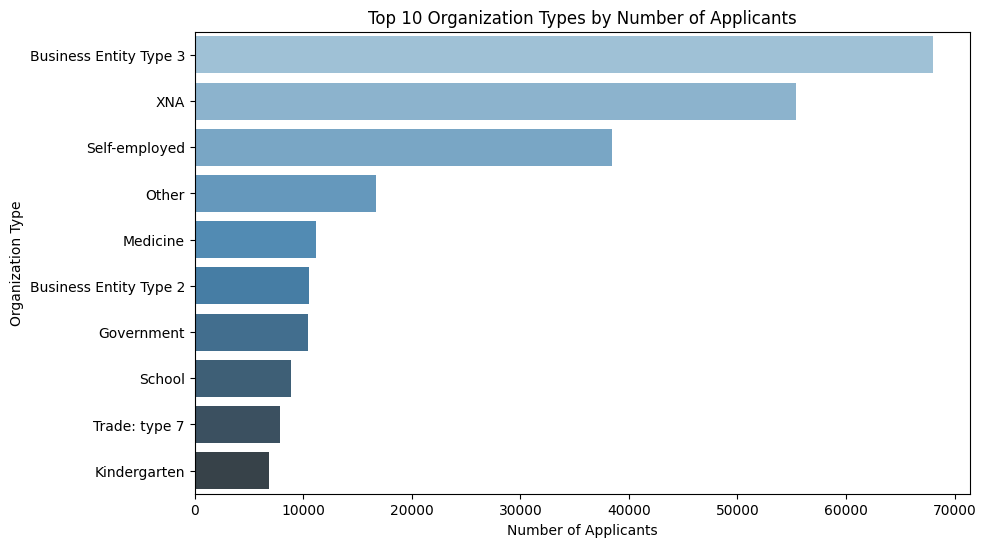

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_orgs = org_counts.head(10)

sns.barplot(x=top_orgs.values, y=top_orgs.index, palette='Blues_d')
plt.xlabel('Number of Applicants')
plt.ylabel('Organization Type')
plt.title('Top 10 Organization Types by Number of Applicants')
plt.show()


In [96]:
risk_by_org = df.groupby('ORGANIZATION_TYPE')['TARGET'].agg(['mean', 'count']).reset_index()
risk_by_org.columns = ['ORGANIZATION_TYPE', 'Default_Rate', 'Applicant_Count']


In [97]:
risk_by_org.columns

Index(['ORGANIZATION_TYPE', 'Default_Rate', 'Applicant_Count'], dtype='object')

In [98]:
risk_by_org

,ORGANIZATION_TYPE,Default_Rate,Applicant_Count
0,Advertising,0.081585,429
1,Agriculture,0.104727,2454
2,Bank,0.051855,2507
3,Business Entity Type 1,0.081384,5984
4,Business Entity Type 2,0.085284,10553
5,Business Entity Type 3,0.092996,67992
6,Cleaning,0.111538,260
7,Construction,0.116798,6721
8,Culture,0.055409,379
9,Electricity,0.066316,950


In [99]:
risk_by_org_sorted = risk_by_org.sort_values(by='Default_Rate', ascending=False)
print(risk_by_org_sorted)


         ORGANIZATION_TYPE  Default_Rate  Applicant_Count
54       Transport: type 3      0.157540             1187
18       Industry: type 13      0.134328               67
25        Industry: type 8      0.125000               24
38              Restaurant      0.117062             1811
7             Construction      0.116798             6721
6                 Cleaning      0.111538              260
14        Industry: type 1      0.110683             1039
20        Industry: type 3      0.106162             3278
36                 Realtor      0.106061              396
1              Agriculture      0.104727             2454
47           Trade: type 3      0.103379             3492
42           Self-employed      0.101739            38412
21        Industry: type 4      0.101482              877
40                Security      0.099784             3247
51           Trade: type 7      0.094496             7831
5   Business Entity Type 3      0.092996            67992
55       Trans

C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\3546822533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


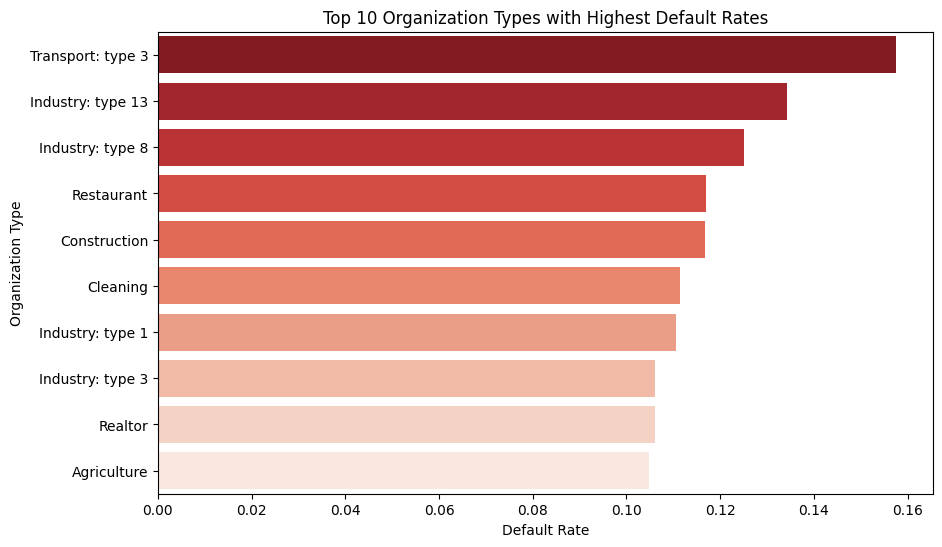

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=risk_by_org_sorted.head(10),
    x='Default_Rate', y='ORGANIZATION_TYPE', palette='Reds_r'
)
plt.xlabel('Default Rate')
plt.ylabel('Organization Type')
plt.title('Top 10 Organization Types with Highest Default Rates')
plt.show()


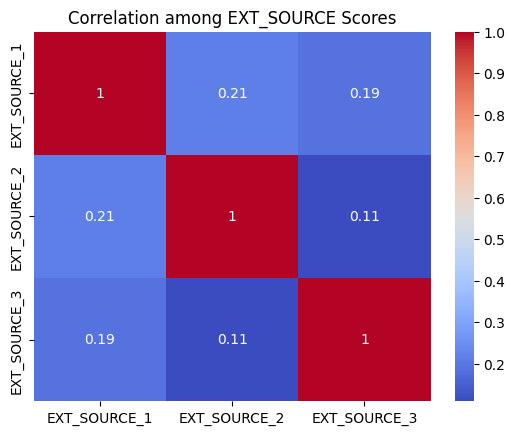

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

ext_sources = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
corr = ext_sources.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation among EXT_SOURCE Scores')
plt.show()


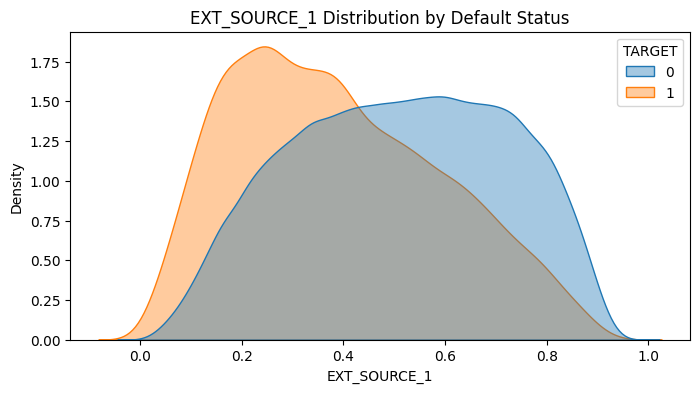

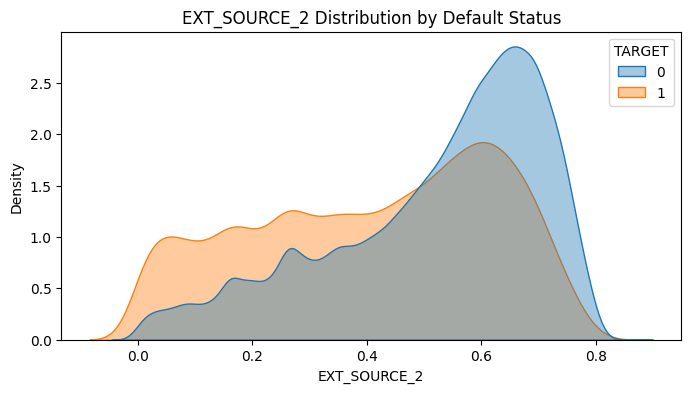

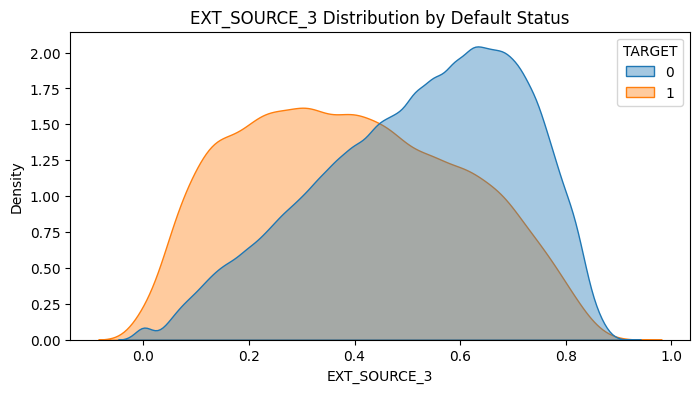

In [102]:
for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df, x=col, hue='TARGET', common_norm=False, fill=True, alpha=0.4)
    plt.title(f'{col} Distribution by Default Status')
    plt.show()


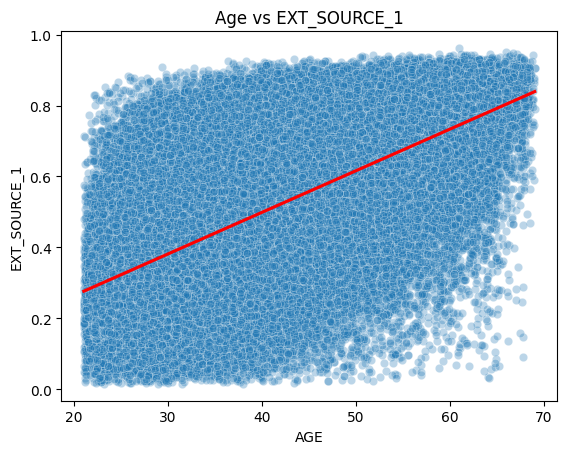

In [103]:
df['AGE'] = -df['DAYS_BIRTH'] / 365

sns.scatterplot(data=df, x='AGE', y='EXT_SOURCE_1', alpha=0.3)
sns.regplot(data=df, x='AGE', y='EXT_SOURCE_1', scatter=False, color='red')
plt.title('Age vs EXT_SOURCE_1')
plt.show()


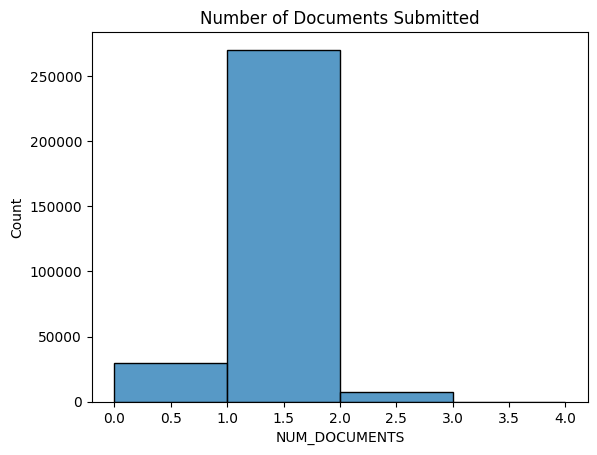

In [104]:
doc_cols = [col for col in df.columns if 'FLAG_DOCUMENT' in col]
df['NUM_DOCUMENTS'] = df[doc_cols].sum(axis=1)

sns.histplot(df['NUM_DOCUMENTS'], bins=range(0, max(df['NUM_DOCUMENTS'])+1))
plt.title('Number of Documents Submitted')
plt.show()


In [105]:
doc_default = df.groupby('FLAG_DOCUMENT_3')['TARGET'].mean()
print(doc_default)


FLAG_DOCUMENT_3
0    0.061825
1    0.088449
Name: TARGET, dtype: float64


C:\Users\yugay\AppData\Local\Temp\ipykernel_13748\1365944059.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


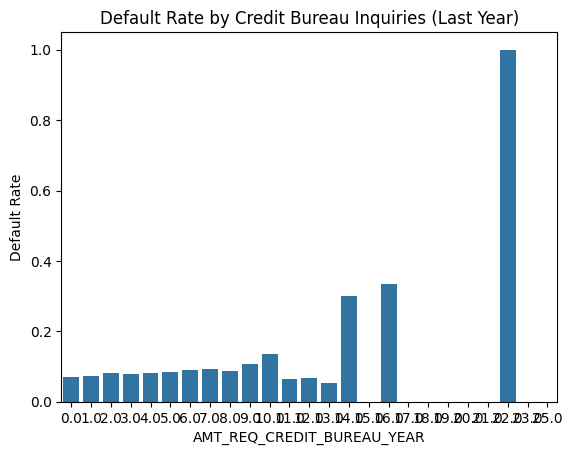

In [106]:
sns.barplot(
    x=df['AMT_REQ_CREDIT_BUREAU_YEAR'], 
    y=df['TARGET'],
    estimator=lambda x: sum(x)/len(x), ci=None
)
plt.ylabel('Default Rate')
plt.title('Default Rate by Credit Bureau Inquiries (Last Year)')
plt.show()


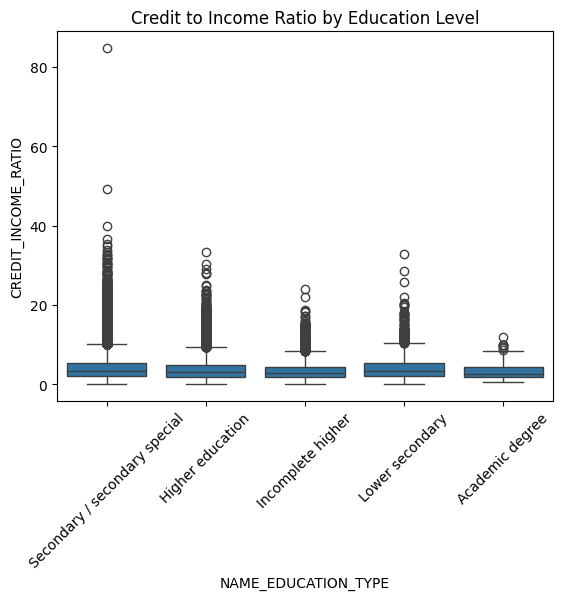

In [107]:
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
sns.boxplot(x='NAME_EDUCATION_TYPE', y='CREDIT_INCOME_RATIO', data=df)
plt.xticks(rotation=45)
plt.title('Credit to Income Ratio by Education Level')
plt.show()


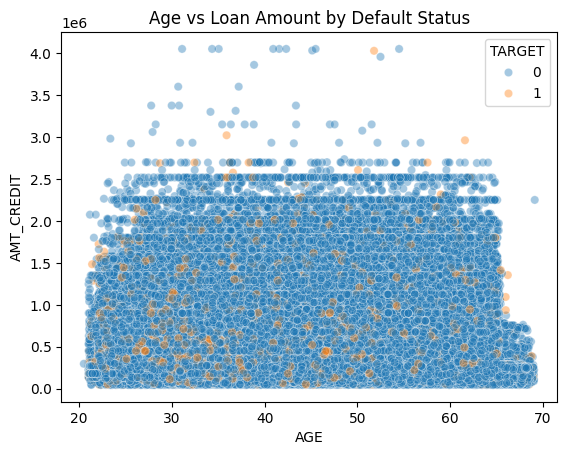

In [108]:
sns.scatterplot(data=df, x='AGE', y='AMT_CREDIT', hue='TARGET', alpha=0.4)
plt.title('Age vs Loan Amount by Default Status')
plt.show()


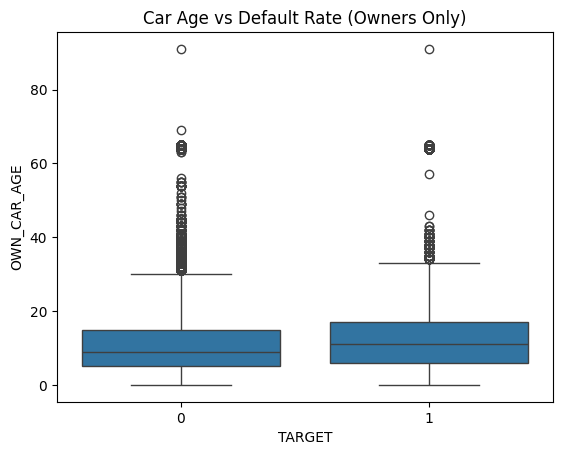

In [109]:
sns.boxplot(x='TARGET', y='OWN_CAR_AGE', data=df[df['FLAG_OWN_CAR']=='Y'])
plt.title('Car Age vs Default Rate (Owners Only)')
plt.show()


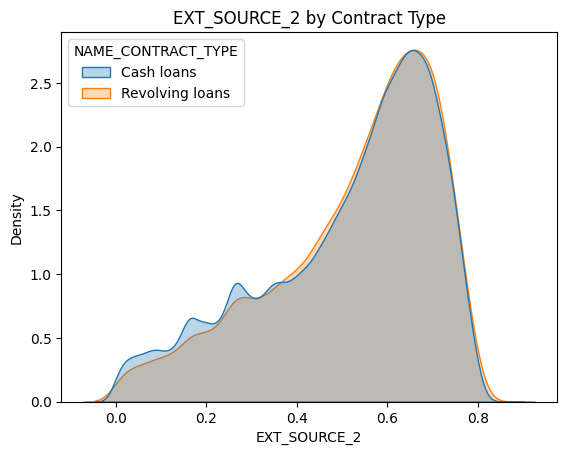

In [110]:
sns.kdeplot(data=df, x='EXT_SOURCE_2', hue='NAME_CONTRACT_TYPE', common_norm=False, fill=True, alpha=0.3)
plt.title('EXT_SOURCE_2 by Contract Type')
plt.show()


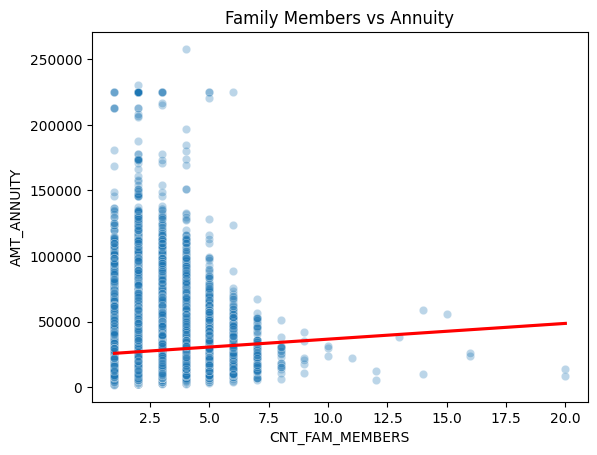

In [111]:
sns.scatterplot(x='CNT_FAM_MEMBERS', y='AMT_ANNUITY', data=df, alpha=0.3)
sns.regplot(x='CNT_FAM_MEMBERS', y='AMT_ANNUITY', data=df, scatter=False, color='red')
plt.title('Family Members vs Annuity')
plt.show()


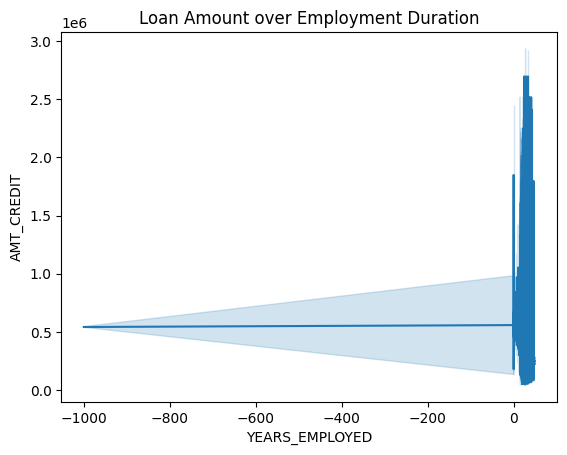

In [112]:
df['YEARS_EMPLOYED'] = -df['DAYS_EMPLOYED']/365
sns.lineplot(x='YEARS_EMPLOYED', y='AMT_CREDIT', data=df)
plt.title('Loan Amount over Employment Duration')
plt.show()


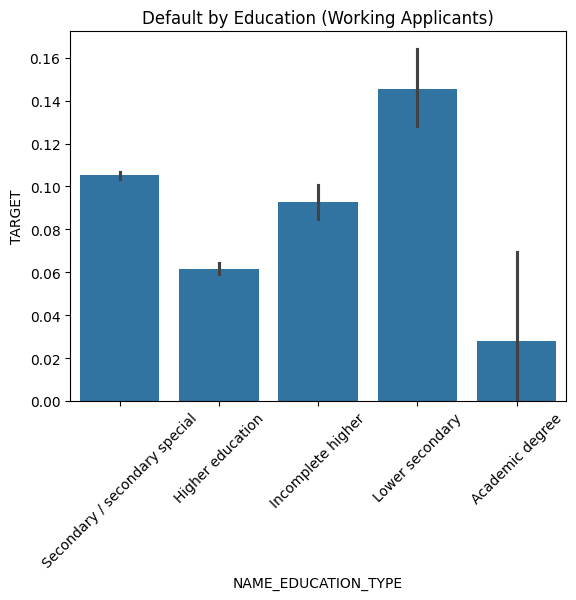

In [113]:
df_working = df[df['NAME_INCOME_TYPE'] == 'Working']
sns.barplot(x='NAME_EDUCATION_TYPE', y='TARGET', data=df_working)
plt.xticks(rotation=45)
plt.title('Default by Education (Working Applicants)')
plt.show()


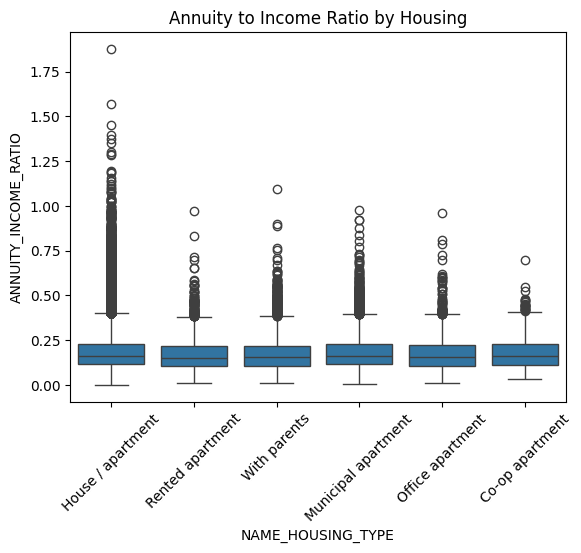

In [114]:
df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
sns.boxplot(x='NAME_HOUSING_TYPE', y='ANNUITY_INCOME_RATIO', data=df)
plt.xticks(rotation=45)
plt.title('Annuity to Income Ratio by Housing')
plt.show()


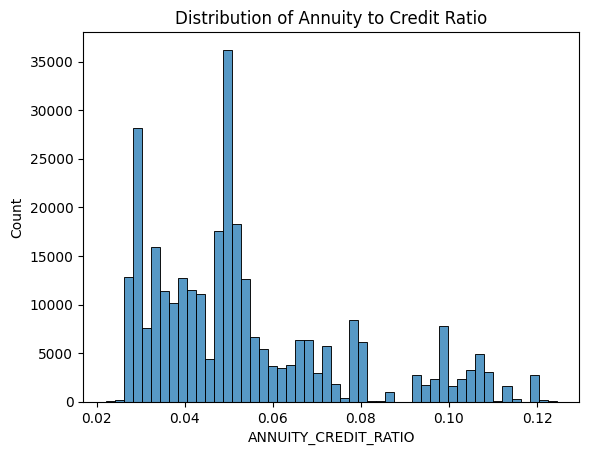

In [117]:
df['ANNUITY_CREDIT_RATIO'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
sns.histplot(df['ANNUITY_CREDIT_RATIO'], bins=50)
plt.title('Distribution of Annuity to Credit Ratio')
plt.show()


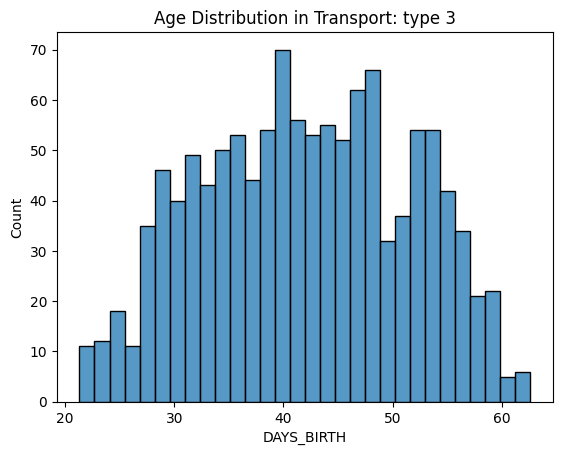

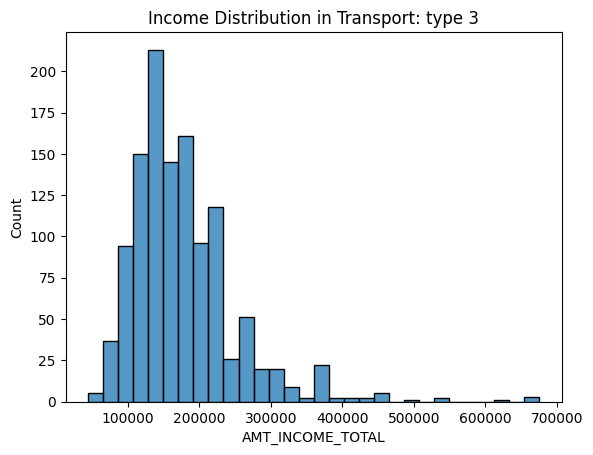

In [120]:
# Find highest risk organization
highest_risk_org = df.groupby('ORGANIZATION_TYPE')['TARGET'].mean().idxmax()
df_high_risk = df[df['ORGANIZATION_TYPE']==highest_risk_org]

sns.histplot(-df_high_risk['DAYS_BIRTH']/365, bins=30)
plt.title(f'Age Distribution in {highest_risk_org}')
plt.show()

sns.histplot(df_high_risk['AMT_INCOME_TOTAL'], bins=30)
plt.title(f'Income Distribution in {highest_risk_org}')
plt.show()
